# Undirected Graph

In [12]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
df = pd.read_csv('./Data/label_pp_sim_2017_2019.csv', delimiter=',')
df

,HS6_i,HS6_j,n_ij,n_i,n_j,n,psim,psim_norm,link01,short_name_ENG_i,short_name_ENG_j,label_i,label_j,label_i_desc,label_j_desc
0,107111,107112,356,6275,6167,731532,6.729699,0.741258,1,Fresh bread containing by,Cake and pastry products;,10,10,Cereals,Cereals
1,181214,181219,60,4081,3683,731532,2.920225,0.489825,1,"Printed books, brochures,",Printed calendars of any,18,18,Cocoa and cocoa preparations,Cocoa and cocoa preparations
2,181212,181214,59,3287,4081,731532,3.217504,0.525786,1,Printed commercial catalo,"Printed books, brochures,",18,18,Cocoa and cocoa preparations,Cocoa and cocoa preparations
3,310112,310912,57,3568,3342,731532,3.496849,0.555244,1,Wooden furniture of a kin,Wooden bedroom furniture,31,31,Fertilizers,Fertilizers
4,181213,181214,55,2586,4081,731532,3.812421,0.584409,1,"Printed newspapers, journ","Printed books, brochures,",18,18,Cocoa and cocoa preparations,Cocoa and cocoa preparations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,242034,289230,1,1226,1175,731532,0.507814,-0.326423,0,"Tubes and pipes, of non-c",Pile-drivers and pile-ext,24,28,Tobacco and manufactured tobacco substitutes; ...,Inorganic chemicals; organic and inorganic com...
40087,242034,289227,1,1226,969,731532,0.615771,-0.237799,0,"Tubes and pipes, of non-c",Bulldozer or angledozer b,24,28,Tobacco and manufactured tobacco substitutes; ...,Inorganic chemicals; organic and inorganic com...
40088,242034,282983,1,1226,1097,731532,0.543922,-0.295403,0,"Tubes and pipes, of non-c",Cylinders for calendering,24,28,Tobacco and manufactured tobacco substitutes; ...,Inorganic chemicals; organic and inorganic com...
40089,242034,282922,1,1226,1720,731532,0.346908,-0.484882,0,"Tubes and pipes, of non-c",Fire extinguishers,24,28,Tobacco and manufactured tobacco substitutes; ...,Inorganic chemicals; organic and inorganic com...


In [14]:
G = nx.Graph()

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)


df['label'] = pd.concat([df['label_i'], df['label_j']], ignore_index=True)

df['encoded_label'] = df['label'].apply(lambda x: 1 if x in [13,18,51,52,24,25, 26, 27,81,21,23,28,29,30, 31, 32, 35, 36,38] else 0)

# nx.draw(G,node_size=50,with_labels=True)

In [19]:
import networkx as nx
import pandas as pd

# Create an empty graph
G = nx.Graph()

# Assuming df is your DataFrame containing the product information and encoded labels

# Add nodes to the graph
unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))
G.add_nodes_from(unique_product_codes)

# Add edges to the graph
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)

# Create a dictionary to map product codes to encoded labels
label_dict = dict(zip(df['HS6_i'], df['encoded_label']))
label_dict.update(dict(zip(df['HS6_j'], df['encoded_label'])))

# Add encoded labels to nodes in the graph
for node in G.nodes():
    G.nodes[node]['encoded_label'] = label_dict.get(node, None)


In [18]:
# Nodes
num_nodes = G.number_of_nodes()
print("Number of Nodes:", num_nodes)

# Edges
num_edges = G.number_of_edges()
print("Number of Edges:", num_edges)

# Sparsity
sparsity = nx.density(G)
print("Sparsity:", sparsity)

# Homophily calculation
def homophily(G):
    num_same_labels = 0
    num_diff_labels = 0

    for u, v in G.edges():
        if G.nodes[u]['encoded_label'] == G.nodes[v]['encoded_label']:
            num_same_labels += 1
        else:
            num_diff_labels += 1

    homophily_coefficient = num_same_labels / (num_same_labels + num_diff_labels)
    return homophily_coefficient

homophily_coefficient = homophily(G)
print("Homophily Coefficient:", homophily_coefficient)

# Labeling ratio
label_counts = pd.Series(nx.get_node_attributes(G, 'encoded_label')).value_counts(normalize=True)
print("Labeling Ratio:")
print(label_counts)

# Label ratio
label_ratio = {label: label_counts.get(label, 0) for label in set(df['encoded_label'])}
print("Label Ratio:", label_ratio)


Number of Nodes: 1361
Number of Edges: 40091
Sparsity: 0.04331914249902753
Homophily Coefficient: 0.6973884412960515
Labeling Ratio:
1    0.562087
0    0.437913
Name: proportion, dtype: float64
Label Ratio: {0: 0.43791329904481996, 1: 0.56208670095518}


In [16]:
# Number of edges
num_edges = G.number_of_edges()

# Number of nodes
num_nodes = len(G.nodes())

# Sparsity
total_possible_edges = (num_nodes * (num_nodes - 1)) / 2
sparsity = num_edges / total_possible_edges

# Calculate homophily
label_counts = {}
for node, label in labels.items():
    label_counts.setdefault(label, 0)
    label_counts[label] += 1

homophily_edges = 0
for u, v in G.edges():
    if labels[u] == labels[v]:
        homophily_edges += 1

homophily = homophily_edges / num_edges

print("Number of edges:", num_edges)
print("Sparsity:", sparsity)
print("Homophily:", homophily)

NameError: name 'labels' is not defined

In [19]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight


# Degree

Density: 0.04331914249902753
Average total degree: 58.914033798677444


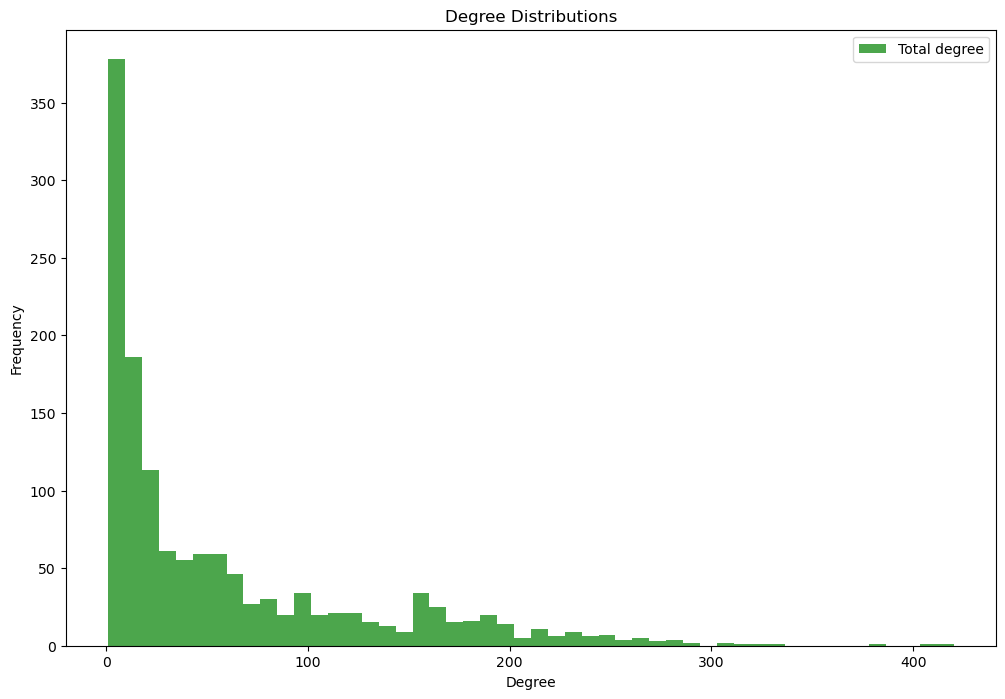

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


density = nx.density(G)
print("Density:", density)


total_degrees = dict(G.degree())


average_total_degree = sum(total_degrees.values()) / len(total_degrees)

print("Average total degree:", average_total_degree)

# Degree distributions

total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))

plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()

# Density

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


# Density
density1 = nx.density(G)
print("Density:", density1)

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)


density2 = nx.density(largest_weakly_connected_component)
print("Density_largest_connected_component:", density2)

Density: 0.04331914249902753
Density_largest_connected_component: 0.04331914249902753


# Maximum Likelihood

Calculating best minimal value for power law fit


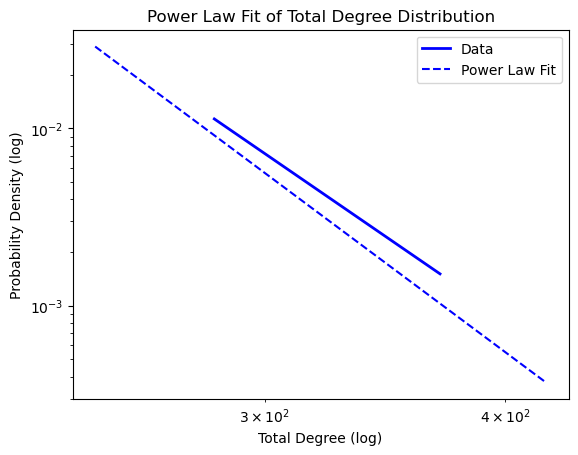

Alpha (scaling parameter): 8.088010355444128
Xmin (minimum value of the power law distribution): 245.0


In [6]:
import powerlaw

fit = powerlaw.Fit(total_degree_sequence)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [7]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]


# Centrality

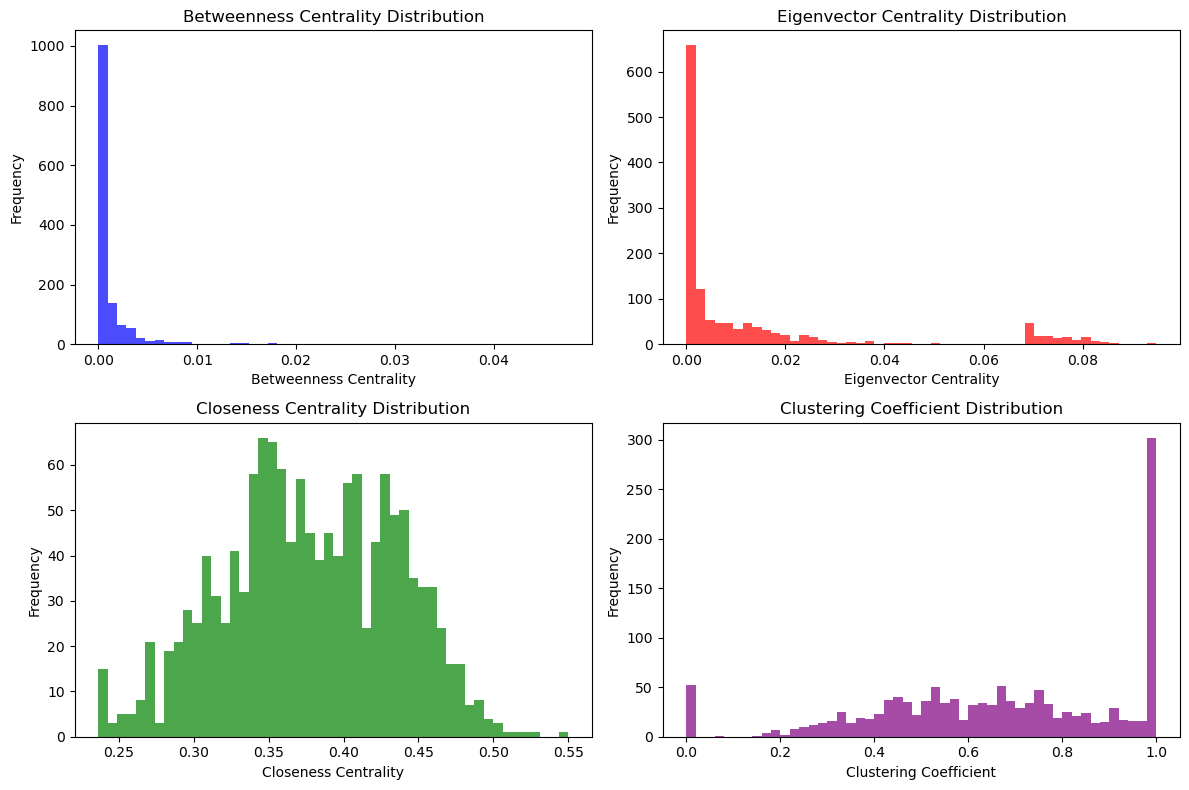

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
import networkx as nx
import pandas as pd

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_ranked_products = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_ranked_products = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_ranked_products = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
clustering_ranked_products = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)

# Create DataFrames for each centrality metric
betweenness_df = pd.DataFrame({
    'Rank': range(1, len(betweenness_ranked_products) + 1),
    'HS6_Code': betweenness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in betweenness_ranked_products],
    'Betweenness_Centrality': [betweenness_centrality[product] for product in betweenness_ranked_products]
})

eigenvector_df = pd.DataFrame({
    'Rank': range(1, len(eigenvector_ranked_products) + 1),
    'HS6_Code': eigenvector_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in eigenvector_ranked_products],
    'Eigenvector_Centrality': [eigenvector_centrality[product] for product in eigenvector_ranked_products]
})

closeness_df = pd.DataFrame({
    'Rank': range(1, len(closeness_ranked_products) + 1),
    'HS6_Code': closeness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in closeness_ranked_products],
    'Closeness_Centrality': [closeness_centrality[product] for product in closeness_ranked_products]
})

clustering_df = pd.DataFrame({
    'Rank': range(1, len(clustering_ranked_products) + 1),
    'HS6_Code': clustering_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in clustering_ranked_products],
    'Clustering_Coefficient': [clustering_coefficient[product] for product in clustering_ranked_products]
})

# Save DataFrames to Excel file with different sheet names
output_file = './Data/centrality_rankings_similarity.xlsx'  # Change the file name and path as needed
with pd.ExcelWriter(output_file) as writer:
    betweenness_df.to_excel(writer, sheet_name='Betweenness_Centrality', index=False)
    eigenvector_df.to_excel(writer, sheet_name='Eigenvector_Centrality', index=False)
    closeness_df.to_excel(writer, sheet_name='Closeness_Centrality', index=False)
    clustering_df.to_excel(writer, sheet_name='Clustering_Coefficient', index=False)


In [15]:
print(df.head())

    HS6_i   HS6_j  n_ij   n_i   n_j       n      psim  psim_norm  link01  \
0  107111  107112   356  6275  6167  731532  6.729699   0.741258       1   
1  181214  181219    60  4081  3683  731532  2.920225   0.489825       1   
2  181212  181214    59  3287  4081  731532  3.217504   0.525786       1   
3  310112  310912    57  3568  3342  731532  3.496849   0.555244       1   
4  181213  181214    55  2586  4081  731532  3.812421   0.584409       1   

            short_name_ENG_i           short_name_ENG_j  
0  Fresh bread containing by  Cake and pastry products;  
1  Printed books, brochures,  Printed calendars of any   
2  Printed commercial catalo  Printed books, brochures,  
3  Wooden furniture of a kin  Wooden bedroom furniture   
4  Printed newspapers, journ  Printed books, brochures,  


In [16]:
import pandas as pd
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')


# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Find all shortest paths
shortest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Find all longest paths
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))

# Initialize variables to store smallest and largest paths
smallest_paths = []
largest_paths = []

# Iterate over all shortest paths to find the smallest one with at least 2 nodes
smallest_length = float('inf')
for source, targets in shortest_paths:
    for target, path in targets.items():
        if len(path) >= 2:
            path_length = len(path)
            if path_length < smallest_length:
                smallest_length = path_length
                smallest_paths = [(source, target, path)]
            elif path_length == smallest_length:
                smallest_paths.append((source, target, path))

# Iterate over all longest paths to find the largest one in terms of number of nodes
largest_node_count = 0
for source, targets in longest_paths:
    for target, path in targets.items():
        if len(path) > largest_node_count:
            largest_node_count = len(path)
            largest_paths = [(source, target, path)]
        elif len(path) == largest_node_count:
            largest_paths.append((source, target, path))

# Replace node names with real names
def replace_with_real_names(paths, df):
    modified_paths = []
    for source, targets in paths:
        for target, path in targets.items():
            path_real_names = []
            for node in path:
                if node in df['HS6_i'].values:
                    real_name = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
                    path_real_names.append(real_name)
                elif node in df['HS6_j'].values:
                    real_name = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
                    path_real_names.append(real_name)
                else:
                    path_real_names.append(node)
            modified_paths.append((source, target, path_real_names))
    return modified_paths

# Replace source, target, and path with real names
# Replace source, target, and path with real names
smallest_paths_with_real_names = []
for source, target, path in smallest_paths:
    if source in df['HS6_i'].values:
        real_source = df.loc[df['HS6_i'] == source, 'short_name_ENG_i'].iloc[0]
    elif source in df['HS6_j'].values:
        real_source = df.loc[df['HS6_j'] == source, 'short_name_ENG_j'].iloc[0]
    else:
        real_source = source

    if target in df['HS6_i'].values:
        real_target = df.loc[df['HS6_i'] == target, 'short_name_ENG_i'].iloc[0]
    elif target in df['HS6_j'].values:
        real_target = df.loc[df['HS6_j'] == target, 'short_name_ENG_j'].iloc[0]
    else:
        real_target = target

    real_path = []
    for node in path:
        if node in df['HS6_i'].values:
            real_node = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
        elif node in df['HS6_j'].values:
            real_node = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
        else:
            real_node = node
        real_path.append(real_node)
    
    smallest_paths_with_real_names.append((real_source, real_target, real_path))

# Replace source, target, and path with real names
largest_paths_with_real_names = []
for source, target, path in largest_paths:
    if source in df['HS6_i'].values:
        real_source = df.loc[df['HS6_i'] == source, 'short_name_ENG_i'].iloc[0]
    elif source in df['HS6_j'].values:
        real_source = df.loc[df['HS6_j'] == source, 'short_name_ENG_j'].iloc[0]
    else:
        real_source = source

    if target in df['HS6_i'].values:
        real_target = df.loc[df['HS6_i'] == target, 'short_name_ENG_i'].iloc[0]
    elif target in df['HS6_j'].values:
        real_target = df.loc[df['HS6_j'] == target, 'short_name_ENG_j'].iloc[0]
    else:
        real_target = target

    real_path = []
    for node in path:
        if node in df['HS6_i'].values:
            real_node = df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0]
        elif node in df['HS6_j'].values:
            real_node = df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]
        else:
            real_node = node
        real_path.append(real_node)

    largest_paths_with_real_names.append((real_source, real_target, real_path))


# Convert paths to dataframes
smallest_df = pd.DataFrame(smallest_paths_with_real_names, columns=["Source", "Target", "Path"])
largest_df = pd.DataFrame(largest_paths_with_real_names, columns=["Source", "Target", "Path"])

# Save dataframes to Excel file
with pd.ExcelWriter("./Data/Similarity_path_results_with_real_names.xlsx") as writer:
    smallest_df.to_excel(writer, sheet_name="Smallest Paths", index=False)
    largest_df.to_excel(writer, sheet_name="Largest Paths", index=False)


# Assortativity

In [22]:
# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

Assortativity Coefficient: 0.1223929036129389


# Community detection

In [25]:
import pandas as pd
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')

G = nx.DiGraph()

# Add the nodes
unique_product_codes = set(df['short_name_ENG_i']).union(set(df['short_name_ENG_j']))
G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['short_name_ENG_i']
    product_j = row['short_name_ENG_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)


# Define the desired number of communities
desired_num_communities = 3

# Community Detection
communities_generator = nx.algorithms.community.girvan_newman(G)
communities = None
for _ in range(desired_num_communities):
    communities = next(communities_generator)

# Filter out communities with less than 2 nodes
communities = [c for c in communities if len(c) >= 2]

# Save the communities to a CSV file
with open('./Data/similarity_community_nodes.csv', 'w') as f:
    f.write('Community,Nodes\n')
    for i, community_nodes in enumerate(communities):
        f.write(f'Community {i+1},')
        f.write(','.join(community_nodes))
        f.write('\n')


In [26]:

# # Modularity-based Communities (Greedy Modularity Maximization)
# modularity_communities = list(nx.community.greedy_modularity_communities(G))

# # Label Propagation Community Detection
# label_propagation_communities = list(nx.community.label_propagation_communities(G))

# louvain_partition = nx.community.best_partition(G)

# k = 3  # Choose the number of communities to detect
# fluid_communities = list(nx.community.asyn_fluidc(G, k))


# Small world

In [18]:
import networkx as nx

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return sum(shortest_path_lengths) / len(shortest_path_lengths) if shortest_path_lengths else float('nan')

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph 10 times and compute the average shortest path length and clustering coefficient
avg_shortest_path_er_total = 0
clustering_coeff_er_total = 0
num_iterations = 100

for _ in range(num_iterations):
    er_graph = nx.erdos_renyi_graph(num_nodes, p)
    avg_shortest_path_er_total += average_shortest_path_length(er_graph)
    clustering_coeff_er_total += nx.average_clustering(er_graph)

avg_shortest_path_er_avg = avg_shortest_path_er_total / num_iterations
clustering_coeff_er_avg = clustering_coeff_er_total / num_iterations

# Print the average results
print("ER Random Graph (Average of 100 runs):")
print("- Average Shortest Path Length:", avg_shortest_path_er_avg)
print("- Clustering Coefficient:", clustering_coeff_er_avg)


ER Random Graph (Average of 100 runs):
- Average Shortest Path Length: 2.4958112222846514
- Clustering Coefficient: 0.021664914753195385


# Cyclicity

In [21]:
df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')

G = nx.Graph()

# Add the nodes
unique_product_codes = set(df['short_name_ENG_i']).union(set(df['short_name_ENG_j']))
G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['short_name_ENG_i']
    product_j = row['short_name_ENG_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)


# Check if the graph contains cycles
if nx.algorithms.dag.is_directed_acyclic_graph(G):
    print("The graph is acyclic.")
else:
    print("The graph contains cycles.")



The graph contains cycles.
